In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [2]:
#Readind data from json
df1 = pd.read_json('as24_cars.json', orient='records')
df = df1.copy() 
df.head().T


,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
short_description,CDi,350+,S 4Matic+ 8G-DCT,4Matic+ 7G-DCT,200CDI BE Line 4M 7G-DCT
make,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n,\nMercedes-Benz\n
model,"[\n, A 160 ,\n]","[\n, EQE 350 ,\n]","[\n, A 45 AMG ,\n]","[\n, A 35 AMG ,\n]","[\n, A 45 AMG ,\n]"
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-","€ 46,990.-","€ 16,800.-"
Body type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
Type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]"
Doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]"
Country version,"[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]","[\n, Spain, \n]"


In [3]:
#Info of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28630 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   Body type                 28630 non-null  object 
 7   Type                      28630 non-null  object 
 8   Doors                     28271 non-null  object 
 9   Country version           16889 non-null  object 
 10  Offer number              23100 non-null  object 
 11  Warranty                  15784 non-null  object 
 12  Mileage                   28629 non-null  object 
 13  First registration        28628 non-null  object 
 14  Gearbo

In [4]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'Body type', 'Type', 'Doors', 'Country version', 'Offer number',
       'Warranty', 'Mileage', 'First registration', 'Gearbox', 'Fuel type',
       'Colour', 'Paint', 'desc', 'seller', 'Seats', 'Power', 'Engine size',
       'Gears', 'CO₂-emissions', 'Manufacturer colour', 'Drivetrain',
       'Cylinders', 'Fuel consumption', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', '\nExtras\n',
       'Empty weight', 'Model code', 'General inspection', 'Last service',
       'Full service history', 'Non-smoker vehicle', 'Emission class',
       'Emissions sticker', 'Upholstery colour', 'Upholstery',
       'Production date', 'Previous owner', 'Other fuel types',
       'Power consumption', 'Energy efficiency class', 'CO₂-efficiency',
       'Fuel consumption (WLTP)', 'CO₂-emissions (WLTP)', 'Available from',
       'Taxi or rental car', 'Availability', 'Last timing b

In [5]:
# Clean column names
df.columns = (
    df.columns
  .str.strip()  # Remove any leading/trailing whitespaces
  .str.normalize('NFKD')  # Remove accents and diacritics (e.g., ₂ -> 2)
  .str.encode('ascii', errors='ignore')  # Remove any remaining non-ASCII characters
  .str.decode('utf-8')  # Convert back to string
  .str.lower()  # Convert to lowercase
  .str.replace(r'[\n\s&-]+', '_', regex=True)  # Replace one or more of \n, space, &, - with a single underscore
  .str.replace(r'[^\w_]', '', regex=True)  # Remove any remaining special characters (except underscores)
  .str.replace(r'_+', '_', regex=True)  # Replace one or more consecutive underscores with a single underscore
)
 
# Display the updated column names
df.columns


Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co2_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co2_efficiency',
       'fuel_consumption_wltp', 'co2_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'elect

In [6]:
#Null Value Analysis Function
def analyze_null_values(df):
    """
    Compute null value counts and percentages for each column in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame to analyze
    
    Returns:
    pandas.DataFrame: DataFrame with null count and percentage for each column
    """
    # Calculate null counts
    null_counts = df.isnull().sum()
    
    # Calculate null percentages
    null_percentages = (df.isnull().sum() / len(df)) * 100
    
    # Combine into a single DataFrame
    null_analysis = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percentages.round(2)
    })
    
    return null_analysis.sort_values(by='Null Percentage')


null_summary = analyze_null_values(df)
null_summary


,Null Count,Null Percentage
make_model,850,2.88
short_description,850,2.88
make,850,2.88
model,850,2.88
location,850,2.88
price,850,2.88
body_type,850,2.88
type,850,2.88
seller,850,2.88
mileage,851,2.89


In [7]:
def drop_high_missing_columns(df, threshold=90):
    """
    Drops columns with a percentage of missing values greater than the specified threshold.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The percentage threshold for dropping columns (default is 90).

    Returns:
        pd.DataFrame: The DataFrame with columns removed.
        list: The list of dropped columns.
    """
    missing_percentages = df.isnull().mean() * 100  # Calculate percentage of missing values
    columns_to_drop = missing_percentages[missing_percentages > threshold].index  # Columns exceeding threshold
    df = df.drop(columns=columns_to_drop)  # Drop the columns
    return df, list(columns_to_drop)
df, columns_to_drop = drop_high_missing_columns(df, threshold=90)
null_summary = analyze_null_values(df)
print('Dropped columns:',columns_to_drop)
print(null_summary)  # Updated null_summary 



Dropped columns: ['last_service', 'other_fuel_types', 'power_consumption', 'fuel_consumption_wltp', 'co2_emissions_wltp', 'available_from', 'taxi_or_rental_car', 'availability', 'last_timing_belt_change', 'electric_range_wltp', 'power_consumption_wltp', 'battery_ownership']
                         Null Count  Null Percentage
make_model                      850             2.88
short_description               850             2.88
make                            850             2.88
model                           850             2.88
location                        850             2.88
price                           850             2.88
body_type                       850             2.88
type                            850             2.88
seller                          850             2.88
mileage                         851             2.89
first_registration              852             2.89
gearbox                        1098             3.72
doors                          1209 

In [8]:
df[['emissions_sticker','co2_emissions',
    'general_inspection','full_service_history','non_smoker_vehicle','energy_efficiency_class']].sample(10)

,emissions_sticker,co2_emissions,general_inspection,full_service_history,non_smoker_vehicle,energy_efficiency_class
17955,NaN,NaN,NaN,NaN,NaN,NaN
10050,NaN,93 g/km (comb.),02/2025,Yes,Yes,A
19365,NaN,NaN,NaN,NaN,NaN,NaN
27588,NaN,NaN,NaN,NaN,NaN,NaN
29071,NaN,152 g/km (comb.),NaN,Yes,Yes,NaN
6683,NaN,118 g/km (comb.),NaN,Yes,Yes,NaN
18028,4 (Green),86 g/km (comb.),06/2024,Yes,Yes,A++
23126,4 (Green),112 g/km (comb.),New,Yes,NaN,A+
17470,4 (Green),178 g/km (comb.),New,Yes,Yes,NaN
9936,4 (Green),115 g/km (comb.),NaN,Yes,Yes,C


In [9]:
df[['make_model','gearbox','location','short_description','engine_size', 'model', 
        'country_version', 'offer_number',
       'colour', 'paint', 'desc',
        'manufacturer_colour', 
        'model_code', 'general_inspection',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery_colour', 'production_date', 
        'co2_efficiency']].sample(5).T

,6334,4795,27509,28096,3745
make_model,Renault Kadjar,Opel Corsa,Volvo XC60,Volvo XC40,Opel Grandland
gearbox,[\nManual\n],[\nManual\n],[\nManual\n],[\nAutomatic\n],[\nAutomatic\n]
location,"Haardt 2, 09247 Chemnitz-Röhrsdorf, DE","Untergath 171, 47805 Krefeld, DE","Avenue Olympe Gilbart 1, 4000 Liège, BE","Kafkastraße 1, 90471 Nürnberg, DE","Im Pfingstwasen 2, 73035 Göppingen, DE"
short_description,TCe 140 Intens NAVI+SHZ+KAMERA+LED+KLIMA,"D 1.2 Energy 3-trg,KLIMAAUTO,SITZHEIZUNG,USB,A...",2.0 D3 Momentum Moritz LEDER/CUIR LED GPS PDC,T4 Geartronic Inscription,2.0 D S&S Automatik 120 Jahre RFK
engine_size,"[\n1,332 cc\n]","[\n1,229 cc\n]","[\n1,969 cc\n]","[\n1,969 cc\n]","[\n1,997 cc\n]"
model,"[\n, Kadjar ,\n]","[\n, Corsa ,\n]","[\n, XC60 ,\n]","[\n, XC40 ,\n]","[\n, Grandland ,\n]"
country_version,"[\n, Germany, \n]","[\n, Germany, \n]","[\n, Belgium, \n]","[\n, Germany, \n]","[\n, Germany, \n]"
offer_number,"[\n, 3797KBR21, \n]","[\n, 6550820, \n]","[\n, 1UXX921, \n]","[\n, 102181686, \n]","[\n, 102107608, \n]"
colour,Grey,Black,Black,Silver,White
paint,Metallic,Metallic,Metallic,Metallic,Metallic


In [10]:
columns_to_drop =['location','short_description', 'model', 
        'country_version', 'offer_number',
       'colour', 'paint', 'desc',
        'manufacturer_colour', 
        'model_code', 'general_inspection',
        'emission_class', 'emissions_sticker',
       'upholstery_colour', 'production_date', 
        'co2_efficiency']
df.drop(columns= columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   make_model               28630 non-null  object
 1   make                     28630 non-null  object
 2   price                    28630 non-null  object
 3   body_type                28630 non-null  object
 4   type                     28630 non-null  object
 5   doors                    28271 non-null  object
 6   warranty                 15784 non-null  object
 7   mileage                  28629 non-null  object
 8   first_registration       28628 non-null  object
 9   gearbox                  28382 non-null  object
 10  fuel_type                26843 non-null  object
 11  seller                   28630 non-null  object
 12  seats                    25505 non-null  object
 13  power                    28058 non-null  object
 14  engine_size              27227 non-nul

In [11]:
null_summary2 = analyze_null_values(df)
null_summary2


,Null Count,Null Percentage
make_model,850,2.88
make,850,2.88
price,850,2.88
body_type,850,2.88
type,850,2.88
seller,850,2.88
mileage,851,2.89
first_registration,852,2.89
gearbox,1098,3.72
doors,1209,4.10


In [12]:
#Cleaning make column
df['make'] = df['make'].str.replace('\n', '', regex=False)
df['make_model'] = df['make_model'].str.strip()

In [13]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
price,"€ 16,950.-","€ 80,900.-","€ 69,900.-","€ 46,990.-","€ 16,800.-"
body_type,"[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]","[\n, Compact, \n]"
type,"[\n, Used, \n]","[\n, Pre-registered, \n]","[\n, Used, \n]","[\n, Used, \n]","[\n, Used, \n]"
doors,"[\n, 5, \n]","[\n, 4, \n]","[\n, 5, \n]","[\n, 5, \n]","[\n, 5, \n]"
warranty,"[\n, 24 months, \n]","[\n, 24 months, \n]","[\n, 12 months, \n]","[\n, 12 months, \n]","[\n, 12 months, \n]"
mileage,"120,200 km","5,000 km","18,900 km","18,995 km","197,000 km"
first_registration,06/2016,06/2022,07/2020,01/2020,09/2015
gearbox,[\nManual\n],[\nAutomatic\n],[\nAutomatic\n],[\nAutomatic\n],[\nAutomatic\n]


In [14]:
#Cleaninng columns in format [\n, Compact, \n]
def clean_columns(df, column_names):
    # Create a copy of the dataframe to avoid modifying the original
    cleaned_df = df.copy()
    
    # Loop through the specified column names
    for column in column_names:
        cleaned_df[column] = cleaned_df[column].astype(str)
        # Clean the column using the extraction method
        cleaned_df[column] = cleaned_df[column].apply(lambda x: x.split(',')[1].strip() if ',' in str(x) else x)
    
    return cleaned_df


In [15]:
cleaned_df = clean_columns(df,
                           column_names=['body_type', 'type','doors', 
                                         'warranty', 'seats','drivetrain'] )

In [16]:
#Cleaning the columns
def clean_data(df, columns):
    def clean_cell(cell):
        """Helper function to clean individual cell values."""
        if isinstance(cell, str):
            # Remove specific unwanted characters '[', ']', and '\n' without affecting other text
            cell = cell.strip('[]').replace('\\n', '').replace("'", "")
        return cell
    df_cleaned =df.copy()
    for column in columns:
        df_cleaned[column] = df_cleaned[column].astype(str)
        # Apply the cleaning function to each cell in the column
        df_cleaned[column] = df_cleaned[column].apply(clean_cell)
    
    return df_cleaned

In [17]:
cleaned_columns = ['gearbox', 'power', 'gears', 'engine_size', 
                   'empty_weight','extras','cylinders','safety_security','entertainment_media','comfort_convenience',
                    'fuel_consumption','previous_owner'		 ]
cleaned_df = clean_data(cleaned_df,columns=cleaned_columns)

In [18]:
numeric_columns = ['price', 'mileage', 'co2_emissions', 'empty_weight','engine_size','warranty']


In [19]:
#Cleaning numeric columns
def clean_numeric(df, columns):
    def clean_cell(cell):
        """Helper function to clean individual cell values."""
        if isinstance(cell, str):
            # Extract numbers using regex
            numbers = re.findall(r'\d+', cell)
            # Join the numbers together (in case there are multiple groups)
            if numbers:
                cleaned_number = ''.join(numbers)
            else:
                cleaned_number = np.nan
        return cleaned_number
    df_cleaned =df.copy()
    for column in columns:
        df_cleaned[column] = df_cleaned[column].astype(str)
        # Apply the cleaning function to each cell in the column
        df_cleaned[column] = df_cleaned[column].apply(clean_cell)
    
    return df_cleaned

In [20]:
cleaned_df = clean_numeric(cleaned_df, columns=numeric_columns)
cleaned_df[numeric_columns].head(10) 

,price,mileage,co2_emissions,empty_weight,engine_size,warranty
0,16950,120200,NaN,NaN,NaN,24
1,80900,5000,0,NaN,1,24
2,69900,18900,NaN,NaN,1991,12
3,46990,18995,NaN,NaN,1991,12
4,16800,197000,NaN,1545,2143,12
5,4690,165000,196,1465,1799,NaN
6,22550,83339,NaN,NaN,NaN,12
7,26900,48900,NaN,1450,1991,24
8,44999,56876,168,NaN,1991,NaN
9,23900,21854,NaN,1365,1991,12


In [21]:
# Function to extract the last number from previous_owner column
def extract_last_number(text):
    # Find all numbers in the string
    numbers = re.findall(r'\d+', text)
    # Return the last number found
    return float(numbers[-1]) if numbers else np.nan


In [22]:
# Apply the function to the 'previous_owner' column and create a new column 'num_previous_owners'
cleaned_df['previous_owner'] = cleaned_df['previous_owner'].apply(extract_last_number)

In [23]:
def clean_and_format_columns(df, columns):
    """
    Converts specified columns to numeric and formats them to show 3 decimal places.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to be processed.
    
    Returns:
        pd.DataFrame: The cleaned and formatted dataframe.
    """
    # Convert columns to numeric, handling NaN values
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Format the columns to always show three decimal places
    for column in columns:
         df[column] = df[column].apply(lambda x: float(f"{x:.3f}") if pd.notna(x) else np.nan)
    
    
    return df



In [24]:
#Numeric columns 'price', 'mileage', 'co₂emissions', 'empty_weight'
columns_to_clean = ['price', 'mileage', 'co2_emissions', 'empty_weight','engine_size','warranty','previous_owner']
cleaned_df = clean_and_format_columns(cleaned_df, columns_to_clean)

In [25]:
cleaned_df[numeric_columns].head(10) 

,price,mileage,co2_emissions,empty_weight,engine_size,warranty
0,16950.0,120200.0,NaN,NaN,NaN,24.0
1,80900.0,5000.0,0.0,NaN,1.0,24.0
2,69900.0,18900.0,NaN,NaN,1991.0,12.0
3,46990.0,18995.0,NaN,NaN,1991.0,12.0
4,16800.0,197000.0,NaN,1545.0,2143.0,12.0
5,4690.0,165000.0,196.0,1465.0,1799.0,NaN
6,22550.0,83339.0,NaN,NaN,NaN,12.0
7,26900.0,48900.0,NaN,1450.0,1991.0,24.0
8,44999.0,56876.0,168.0,NaN,1991.0,NaN
9,23900.0,21854.0,NaN,1365.0,1991.0,12.0


In [26]:
# Function to extract combined fuel consumption
def extract_combined_fuel_consumption(fuel_consumption):
    match = re.search(r'(\d+\.\d+) l/100 km \(comb\.\)', fuel_consumption)
    if match:
        return float(match.group(1))
    return None

In [27]:
 #Apply the function to create a new column
cleaned_df['avg_fuel_consumption'] = cleaned_df['fuel_consumption'].apply(extract_combined_fuel_consumption)

In [28]:
cleaned_df['avg_fuel_consumption'].head(5)

0    NaN
1    NaN
2    8.4
3    7.3
4    4.9
Name: avg_fuel_consumption, dtype: float64

In [29]:
# Extract the horsepower as a number
cleaned_df['horsepower'] = cleaned_df['power'].str.extract(r'\((\d+) hp\)').astype(float)

In [30]:
cleaned_df['horsepower'] 

0          NaN
1        292.0
2        421.0
3        306.0
4        136.0
         ...  
29475    170.0
29476    114.0
29477    254.0
29478    200.0
29479      NaN
Name: horsepower, Length: 29480, dtype: float64

In [31]:
#number of unique values of fuel_type
print(cleaned_df['fuel_type'].nunique()) 
# Get unique values in the 'fuel_type' column
unique_fuel_types = cleaned_df['fuel_type'].unique()
print(unique_fuel_types) # Print the  unique_fuel_types

46
['Diesel' 'Electric' 'Gasoline' 'Regular/Benzine 91' nan
 'Regular/Benzine 91 (Particle filter)' 'Super 95' 'Super E10 95' 'LPG'
 'Diesel (Particle filter)' 'Gasoline (Particle filter)'
 'Super 95 (Particle filter)' 'Liquid petroleum gas (LPG)' 'Super Plus 98'
 'Super E10 95 (Particle filter)' 'Regular/Benzine E10 91'
 'Super Plus E10 98' 'Super Plus E10 98 (Particle filter)' 'Others'
 'Super Plus 98 (Particle filter)'
 'Liquid petroleum gas (LPG) / Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Biogas'
 'Ethanol' 'Regular/Benzine E10 91 (Particle filter)' 'CNG'
 'Liquid petroleum gas (LPG) (Particle filter) / Super 95 / Super E10 95'
 'Others (Particle filter)'
 'Liquid petroleum gas (LPG) / Super 95 / Super E10 95'
 'LPG (Particle filter)' 'Electric (Particle filter)' 'Domestic gas L'
 'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95'
 'CNG (Particle filter)' 'Domestic gas H'
 'Domestic gas L (Particle filter)' 'Biogas'
 'Do

In [32]:
for i, fuel_type in enumerate(unique_fuel_types):
    print(i+1, "-", fuel_type)

1 - Diesel
2 - Electric
3 - Gasoline
4 - Regular/Benzine 91
5 - nan
6 - Regular/Benzine 91 (Particle filter)
7 - Super 95
8 - Super E10 95
9 - LPG
10 - Diesel (Particle filter)
11 - Gasoline (Particle filter)
12 - Super 95 (Particle filter)
13 - Liquid petroleum gas (LPG)
14 - Super Plus 98
15 - Super E10 95 (Particle filter)
16 - Regular/Benzine E10 91
17 - Super Plus E10 98
18 - Super Plus E10 98 (Particle filter)
19 - Others
20 - Super Plus 98 (Particle filter)
21 - Liquid petroleum gas (LPG) / Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Biogas
22 - Ethanol
23 - Regular/Benzine E10 91 (Particle filter)
24 - CNG
25 - Liquid petroleum gas (LPG) (Particle filter) / Super 95 / Super E10 95
26 - Others (Particle filter)
27 - Liquid petroleum gas (LPG) / Super 95 / Super E10 95
28 - LPG (Particle filter)
29 - Electric (Particle filter)
30 - Domestic gas L
31 - Liquid petroleum gas (LPG) / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95
32 - CNG (Particle fil

In [33]:
# Define the mapping dictionary
fuel_type_mapping = {
    'Diesel': 'Diesel',
    'Electric': 'Electric',
    'Gasoline': 'Benzine',
    'Regular/Benzine 91': 'Benzine',
    'Regular/Benzine 91 (Particle filter)': 'Benzine',
    'Super 95': 'Benzine',
    'Super E10 95': 'Benzine',
    'LPG': 'LPG',
    'Diesel (Particle filter)': 'Diesel',
    'Gasoline (Particle filter)': 'Benzine',
    'Super 95 (Particle filter)': 'Benzine',
    'Liquid petroleum gas (LPG)': 'LPG',
    'Super Plus 98': 'Benzine',
    'Super E10 95 (Particle filter)': 'Benzine',
    'Regular/Benzine E10 91': 'Benzine',
    'Super Plus E10 98': 'Benzine',
    'Super Plus E10 98 (Particle filter)': 'Benzine',
    'Others': 'Other',
    'Super Plus 98 (Particle filter)': 'Benzine',
    'Liquid petroleum gas (LPG) / Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Biogas': 'LPG',
    'Ethanol': 'Other',
    'Regular/Benzine E10 91 (Particle filter)': 'Benzine',
    'CNG': 'Other',
    'Liquid petroleum gas (LPG) (Particle filter) / Super 95 / Super E10 95': 'LPG',
    'Others (Particle filter)': 'Other',
    'Liquid petroleum gas (LPG) / Super 95 / Super E10 95': 'LPG',
    'LPG (Particle filter)': 'LPG',
    'Electric (Particle filter)': 'Electric',
    'Domestic gas L': 'LPG',
    'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95': 'LPG',
    'CNG (Particle filter)': 'Other',
    'Domestic gas H': 'Other',
    'Domestic gas L (Particle filter)': 'Other',
    'Biogas': 'Other',
    'Domestic gas H / Super E10 95 / Super Plus E10 98 / Super 95 / Super Plus 98 / Domestic gas L': 'LPG',
    'Domestic gas L / Super 95 / Domestic gas H': 'LPG',
    'Super 95 / Super Plus 98 / Liquid petroleum gas (LPG)': 'LPG',
    'Liquid petroleum gas (LPG) (Particle filter)': 'LPG',
    'Liquid petroleum gas (LPG) / Super 95': 'LPG',
    'Liquid petroleum gas (LPG) / Super 95 / Super E10 95 / Super Plus 98': 'LPG',
    'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98': 'LPG',
    'Liquid petroleum gas (LPG) / Super E10 95': 'LPG',
    'Liquid petroleum gas (LPG) / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95': 'LPG',
    'Hydrogen': 'Other',
    'Super 95 (Particle filter) / Super E10 95 / Ethanol': 'Benzine',
    'Super 95 / Liquid petroleum gas (LPG)': 'LPG',
    'nan':np.nan
}


cleaned_df['categorized_fuel_type'] = cleaned_df['fuel_type'].map(fuel_type_mapping)




In [34]:
# Check the result
cleaned_df[['fuel_type','categorized_fuel_type']].sample(10)

,fuel_type,categorized_fuel_type
9242,Gasoline (Particle filter),Benzine
23610,Super 95,Benzine
26473,Diesel,Diesel
11389,Diesel,Diesel
15632,Gasoline,Benzine
14999,Super 95,Benzine
17083,Super 95,Benzine
4807,Diesel,Diesel
5236,Regular/Benzine 91,Benzine
7880,Diesel,Diesel


In [35]:
#print 
print(cleaned_df['fuel_type'].nunique())
print(cleaned_df['categorized_fuel_type'].nunique())

46
5


In [36]:
# Convert first_registration to datetime
cleaned_df['first_registration'] = pd.to_datetime(cleaned_df['first_registration'], format='%m/%Y', errors='coerce')
#Assuming year is 2022
assuming_year = 2022   
# Calculate vehicle age
cleaned_df['age'] = assuming_year- cleaned_df['first_registration'].dt.year
cleaned_df['age'].sample(5)


4135      2.0
1905      4.0
8956     13.0
14307     0.0
7936     18.0
Name: age, dtype: float64

In [37]:
# Convert columns to numeric
cleaned_df['doors'] = pd.to_numeric(cleaned_df['doors'], errors='coerce')
cleaned_df['gears'] = pd.to_numeric(cleaned_df['gears'], errors='coerce')
cleaned_df['cylinders'] = pd.to_numeric(cleaned_df['cylinders'], errors='coerce')

In [38]:
cleaned_df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.0,4.0,5.0,5.0,5.0
warranty,24.0,24.0,12.0,12.0,12.0
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
first_registration,2016-06-01 00:00:00,2022-06-01 00:00:00,2020-07-01 00:00:00,2020-01-01 00:00:00,2015-09-01 00:00:00
gearbox,Manual,Automatic,Automatic,Automatic,Automatic


In [39]:
dropped_columns = ['first_registration','power','fuel_consumption','fuel_type']
cleaned_df.drop(columns=dropped_columns, inplace=True)
cleaned_df =cleaned_df.replace('nan', np.nan)

In [40]:
cleaned_final = cleaned_df.copy()
cleaned_final.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.0,4.0,5.0,5.0,5.0
warranty,24.0,24.0,12.0,12.0,12.0
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
gearbox,Manual,Automatic,Automatic,Automatic,Automatic
seller,Dealer,Dealer,Dealer,Dealer,Dealer


In [41]:
cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               28630 non-null  object 
 1   make                     28630 non-null  object 
 2   price                    28630 non-null  float64
 3   body_type                28630 non-null  object 
 4   type                     28630 non-null  object 
 5   doors                    28271 non-null  float64
 6   warranty                 13465 non-null  float64
 7   mileage                  28629 non-null  float64
 8   gearbox                  28382 non-null  object 
 9   seller                   28630 non-null  object 
 10  seats                    25505 non-null  object 
 11  engine_size              27227 non-null  float64
 12  gears                    18954 non-null  float64
 13  co2_emissions            18594 non-null  float64
 14  drivetrain            

In [42]:
cleaned_final.describe().T

,count,mean,std,min,25%,50%,75%,max
price,28630.0,23555.202131,25953.706540,490.0,11990.0,17980.0,27990.0,1346900.0
doors,28271.0,4.147855,1.207979,1.0,3.0,5.0,5.0,6.0
warranty,13465.0,17.777274,14.554171,0.0,12.0,12.0,12.0,142.0
mileage,28629.0,72627.043802,67628.435048,0.0,20290.0,57500.0,106673.0,1440000.0
engine_size,27227.0,1755.001983,1029.859982,0.0,1332.0,1598.0,1984.0,99900.0
gears,18954.0,5.884932,1.476884,0.0,5.0,6.0,6.0,10.0
co2_emissions,18594.0,134.309616,145.537994,0.0,107.0,127.0,159.0,15168.0
cylinders,18852.0,4.075854,1.003403,0.0,4.0,4.0,4.0,26.0
empty_weight,17758.0,1421.411702,335.601925,75.0,1206.0,1387.0,1598.0,15590.0
previous_owner,14015.0,1.432679,0.860973,1.0,1.0,1.0,2.0,14.0


In [43]:
# Select only numerical columns
numerical_data = cleaned_final.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                         price     doors  warranty   mileage  engine_size  \
price                 1.000000  0.007732  0.097242 -0.304741     0.313368   
doors                 0.007732  1.000000  0.035480 -0.277501    -0.263862   
warranty              0.097242  0.035480  1.000000 -0.285140    -0.036579   
mileage              -0.304741 -0.277501 -0.285140  1.000000     0.099853   
engine_size           0.313368 -0.263862 -0.036579  0.099853     1.000000   
gears                 0.340632  0.077960  0.012571 -0.105283     0.228702   
co2_emissions         0.070272 -0.178796 -0.075125  0.088488     0.226186   
cylinders             0.367945 -0.353712 -0.078518  0.128965     0.791128   
empty_weight          0.537410  0.015718  0.041957 -0.054195     0.504317   
previous_owner       -0.193956 -0.286663 -0.056052  0.428763     0.089811   
avg_fuel_consumption  0.212262 -0.432745 -0.011208  0.113799     0.398187   
horsepower            0.672286 -0.220212  0.034452 -0.094082     0.580569   

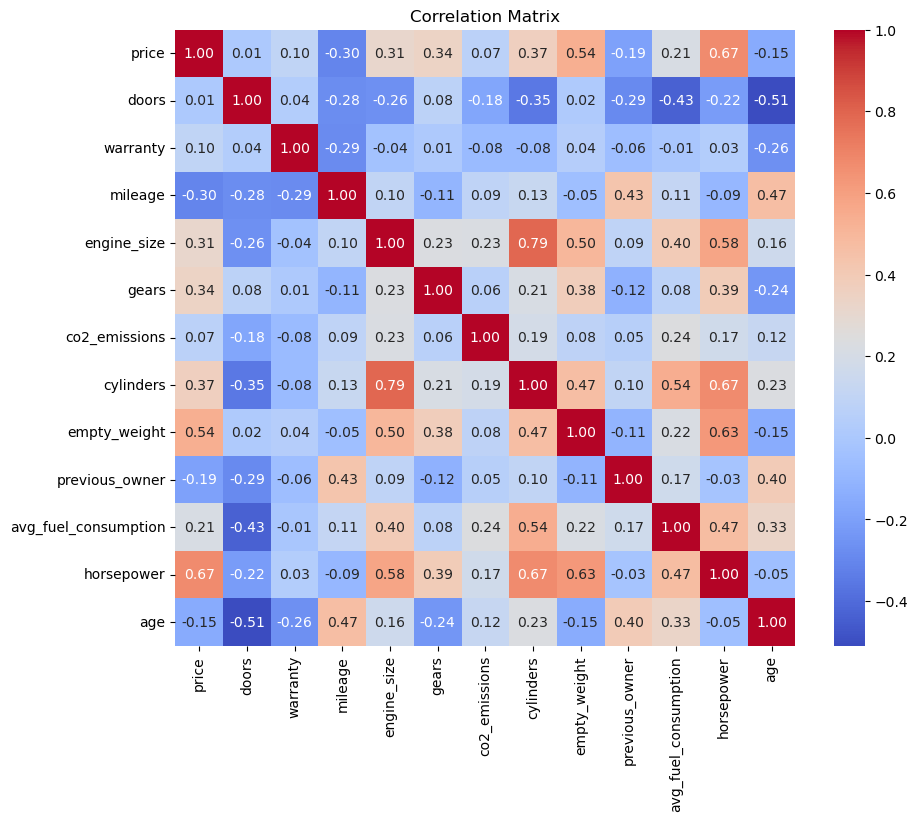

In [44]:

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [45]:
cleaned_final.to_csv('cleaned_df.csv', index=False)